# Project details - regression

**Background**: You are working as an analyst for a real estate company. Your company wants to build a machine learning model to predict the selling prices of houses based on a variety of features on which the value of the house is evaluated.

**Objective**: The task is to build a model that will predict the price of a house based on features provided in the dataset. The senior management also wants to explore the characteristics of the houses using some business intelligence tool. One of those parameters include understanding which factors are responsible for higher property value - \$650K and above.
The questions have been provided later in the document for which you can use tableau.

**Data**: The data set consists of information on some 22,000 properties.  The dataset consisted of historic data of houses sold between May 2014 to May 2015.
These are the definitions of data points provided:
(Note: For some of the variables that are self explanatory, no definition has been provided)

- **Id**: Unique identification number for the property.
- **date**: date the house was sold.
- **price**: price of the house.
- **waterfront**: house which has a view to a waterfront.
- **condition**: How good the condition is (overall). **1** indicates worn out property and **5** excellent.
- **grade**: Overall grade given to the housing unit, based on King County grading system. 1 poor ,13 excellent.
- **Sqft_above**: square footage of house apart from basement.
- **Sqft_living15**: Living room area in 2015(implies - some renovations). This might or might not have affected the lotsize area.
- **Sqft_lot15**: lotSize area in 2015(implies - some renovations).

### Exploring the data

We encourage you to thoroughly understand your data and take the necessary steps to prepare your data for modeling before building exploratory or predictive models. Since this is a classification model, you can use linear regression for classification for building a model. You are also encouraged to use other models in your project including KNN, decision trees for regression.
To explore the data, you can use the techniques that have been discussed in class. Some of them include using the describe method, checking null values, using _matplotlib_ and _seaborn_ for developing visualizations.
The data has a number of categorical and numerical variables. Explore the nature of data for these variables before you start with the data cleaning process and then data pre-processing (scaling numerical variables and encoding categorical variables).
You will also use powerbi to visually explore the data further.


### Model

Use different models to compare the accuracies and find the model that best fits your data. You can use the measures of accuracies that have been discussed in class. Please note that while comparing different models, make sure you use the same measure of accuracy as a benchmark.


### Import data

In [1186]:
import pandas as pd
import numpy as np

In [1187]:
data = pd.read_csv('./regression_data.csv', header=None)

In [1188]:
data.columns = ['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price']

In [1189]:
data

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,10/13/14,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,12/9/14,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2/25/15,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,12/9/14,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2/18/15,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/14,3,2.50,1530,1131,3.0,0,0,3,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,6600060120,2/23/15,4,2.50,2310,5813,2.0,0,0,3,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,1523300141,6/23/14,2,0.75,1020,1350,2.0,0,0,3,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,291310100,1/16/15,3,2.50,1600,2388,2.0,0,0,3,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


### Data types

In [1190]:
data.dtypes

id                 int64
date              object
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
price              int64
dtype: object

### Data cleaning

In [1191]:
deleted = ['id', 'date']
years = ['yr_built', 'yr_renovated']
categoricals = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'grade', 'condition']
numericals = ['sqft_lot', 'yr_renovated', 'sqft_living', 'lat', 'long', 'zipcode', 'yr_built', 'sqft_living15', 'sqft_lot15', 'sqft_basement',  'sqft_above']

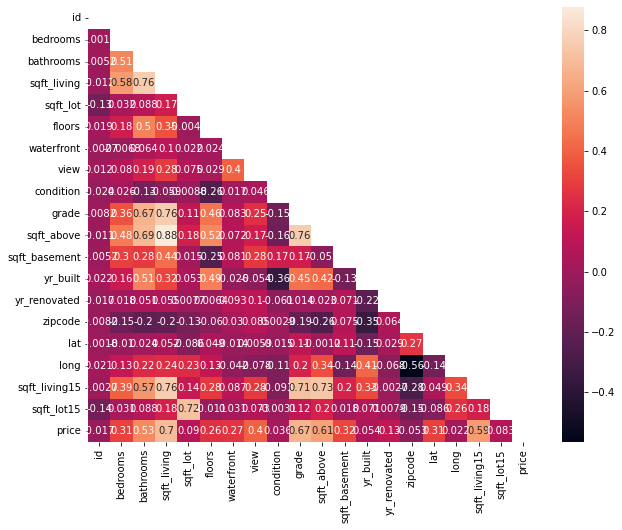

In [1192]:
import seaborn as sns
import matplotlib.pyplot as plt
correlations_matrix = data.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [1193]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = data[['sqft_basement', 'sqft_lot', 'yr_renovated', 'sqft_living', 'yr_built', 'lat', 'long', 'zipcode', 'sqft_living15', 'sqft_lot15', 'sqft_above']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                        for i in range(len(X.columns))]

print(vif_data)

          feature           VIF
0   sqft_basement           inf
1        sqft_lot  2.368034e+00
2    yr_renovated  1.124237e+00
3     sqft_living           inf
4        yr_built  6.173883e+03
5             lat  1.312656e+05
6            long  1.311979e+06
7         zipcode  1.526318e+06
8   sqft_living15  2.380197e+01
9      sqft_lot15  2.576715e+00
10     sqft_above           inf


C:\Users\CG921YH\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


#### Deleted

In [1194]:
data = data.drop(columns = ['id', 'date'])
data

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


#### Transform to categoricals

In [1195]:
for i in categoricals:
    data[i] = data[i].astype(object)

In [1196]:
data.dtypes

bedrooms          object
bathrooms         object
sqft_living        int64
sqft_lot           int64
floors            object
waterfront        object
view              object
condition         object
grade             object
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
price              int64
dtype: object

In [1197]:
data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,2,1.0,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,4,3.0,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,3,2.0,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


#### Comprobando NaNs

In [1198]:
data.isna().sum()

bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

#### Comprobando Outliers

<AxesSubplot:>

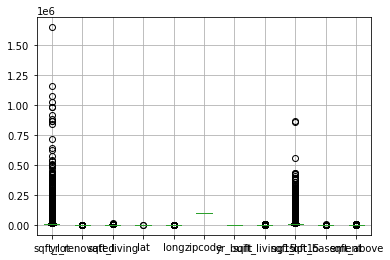

In [1199]:
data.boxplot(numericals)

In [1200]:
for x in ['sqft_lot15']:
    q75,q25 = np.percentile(data.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    data.loc[data[x] < min,x] = np.nan
    data.loc[data[x] > max,x] = np.nan

In [1201]:
for x in ['sqft_lot']:
    q75,q25 = np.percentile(data.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    data.loc[data[x] < min,x] = np.nan
    data.loc[data[x] > max,x] = np.nan

In [1202]:
data = data.dropna(axis=0)

<AxesSubplot:>

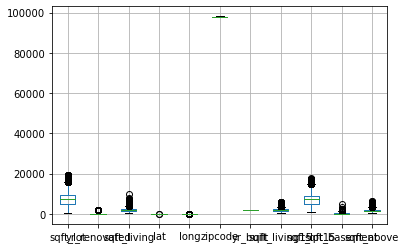

In [1203]:
data.boxplot(numericals)

In [1204]:
data.isna().sum()

bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

In [1205]:
data.to_csv('regression_clean.csv')

### Standardize

In [1206]:
from sklearn.preprocessing import StandardScaler

In [1207]:
for c in numericals:   # we'll normalize all column except the last one (the target column)
    data[c]=StandardScaler().fit_transform(data[c].values.reshape(-1, 1))

C:\Users\CG921YH\AppData\Local\Temp\ipykernel_23536\2437731341.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[c]=StandardScaler().fit_transform(data[c].values.reshape(-1, 1))
C:\Users\CG921YH\AppData\Local\Temp\ipykernel_23536\2437731341.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[c]=StandardScaler().fit_transform(data[c].values.reshape(-1, 1))
C:\Users\CG921YH\AppData\Local\Temp\ipykernel_23536\2437731341.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

### Encoding Categorical Data

In [1208]:
one_hot_data=pd.get_dummies(data[categoricals])   # one hot encoding categorical variables

one_hot_data.head()

C:\Users\CG921YH\Anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bedrooms_10,...,grade_9,grade_10,grade_11,grade_12,grade_13,condition_1,condition_2,condition_3,condition_4,condition_5
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [1209]:
one_hot_data.columns

Index(['bedrooms_1', 'bedrooms_2', 'bedrooms_3', 'bedrooms_4', 'bedrooms_5',
       'bedrooms_6', 'bedrooms_7', 'bedrooms_8', 'bedrooms_9', 'bedrooms_10',
       'bedrooms_11', 'bedrooms_33', 'bathrooms_0.5', 'bathrooms_0.75',
       'bathrooms_1.0', 'bathrooms_1.25', 'bathrooms_1.5', 'bathrooms_1.75',
       'bathrooms_2.0', 'bathrooms_2.25', 'bathrooms_2.5', 'bathrooms_2.75',
       'bathrooms_3.0', 'bathrooms_3.25', 'bathrooms_3.5', 'bathrooms_3.75',
       'bathrooms_4.0', 'bathrooms_4.25', 'bathrooms_4.5', 'bathrooms_4.75',
       'bathrooms_5.0', 'bathrooms_5.25', 'bathrooms_5.5', 'bathrooms_5.75',
       'bathrooms_6.0', 'bathrooms_6.5', 'bathrooms_6.75', 'bathrooms_7.5',
       'floors_1.0', 'floors_1.5', 'floors_2.0', 'floors_2.5', 'floors_3.0',
       'floors_3.5', 'waterfront_0', 'waterfront_1', 'view_0', 'view_1',
       'view_2', 'view_3', 'view_4', 'grade_3', 'grade_4', 'grade_5',
       'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11',
       'grade_12'

## Concat numerical and categorical 

In [1210]:
data=pd.concat([data, one_hot_data], axis=1)   # concat dataframes
data.drop(columns=categoricals, inplace=True)
data.head()

,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,...,grade_9,grade_10,grade_11,grade_12,grade_13,condition_1,condition_2,condition_3,condition_4,condition_5
0,-0.979265,-0.463501,-0.706175,-0.671913,-0.504331,-0.202418,1.791720,-0.382521,-0.215666,-0.901958,...,0,0,0,0,0,0,0,1,0,0
1,0.709415,-0.009720,0.631056,0.276935,-0.636668,4.926061,0.810196,1.162719,-0.685468,-0.348801,...,0,0,0,0,0,0,0,1,0,0
2,-1.477365,0.776416,-1.259978,-0.671913,-1.232188,-0.202418,-0.986180,1.287193,-0.033807,1.279061,...,0,0,0,0,0,0,0,1,0,0
3,-0.031661,-0.648776,-0.881771,1.486718,-0.173486,-0.202418,1.013908,-0.311814,-1.246200,-0.870349,...,0,0,0,0,0,0,0,0,0,1
4,-0.371827,0.229142,-0.030806,-0.671913,0.554371,-0.202418,-0.134290,0.395255,1.390756,-0.174952,...,0,0,0,0,0,0,0,1,0,0


## Modelo

#### Split into train and test

In [1211]:
# first, split X-y (learning-target data)
X= data.drop(columns=['price'])
y= data['price']

# checking shape
print(X.shape)
print(y.shape)

(18901, 78)
(18901,)


In [1212]:
# train_test_split
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)

#### Modeling

### Linear Regression

In [1213]:
from sklearn.linear_model import LinearRegression as LinReg
linreg=LinReg()    # model
linreg.fit(X_train, y_train)   # model train
y_pred_linreg=linreg.predict(X_test)   # model prediction

### Regulation

In [1214]:
from sklearn.linear_model import Lasso     
from sklearn.linear_model import Ridge       
from sklearn.linear_model import ElasticNet

In [1215]:
# Lasso L1

lasso=Lasso()
lasso.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)

C:\Users\CG921YH\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.683e+13, tolerance: 1.549e+11
  model = cd_fast.enet_coordinate_descent(


In [1216]:
# Ridge L2

ridge=Ridge()
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)

In [1217]:
# ElasticNet L1+L2

elastic=ElasticNet()
elastic.fit(X_train, y_train)

y_pred_elastic = elastic.predict(X_test)

### Random Forest Regressor

In [1218]:
from sklearn.ensemble import RandomForestRegressor as RFR

rfr=RFR()
rfr.fit(X_train, y_train)

y_pred_rfr = rfr.predict(X_test)

### XGBoost

In [1219]:
# conda install -c conda-forge xgboost

from xgboost import XGBRegressor as XGBR

xgbr=XGBR()
xgbr.fit(X_train, y_train)

y_pred_xgbr = xgbr.predict(X_test)

C:\Users\CG921YH\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


### LightGBM

In [1220]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
iris = load_iris()
logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=200,
                                  random_state=0)
distributions = dict(C=uniform(loc=0, scale=600),
                     penalty=['l2', 'l1'])
clf = RandomizedSearchCV(logistic, distributions, random_state=0)
search = clf.fit(iris.data, iris.target)
search.best_params_

{'C': 329.28810235639486, 'penalty': 'l1'}

In [1221]:
# conda install -c conda-forge lightgbm
from lightgbm import LGBMRegressor as LGBMR

lgbmr=LGBMR()
lgbmr.fit(X_train, y_train)

y_pred_lgbmr = lgbmr.predict(X_test)

## Model Validation

In [1222]:
models=[linreg, lasso, ridge, elastic, rfr, xgbr, lgbmr]
model_names=['linreg', 'lasso', 'ridge', 'elastic', 'rfr', 'xgbr', 'lgbmr']
preds=[y_pred_linreg, y_pred_lasso, y_pred_ridge, y_pred_elastic, y_pred_rfr, y_pred_xgbr, y_pred_lgbmr]

### R2

In [1223]:
for i in range(len(models)):

    train_score=models[i].score(X_train, y_train) #R2
    test_score=models[i].score(X_test, y_test)

    print ('Model: {}, train R2: {} -- test R2: {}'.format(model_names[i], train_score, test_score))

Model: linreg, train R2: 0.7506466782501742 -- test R2: 0.692178366832306
Model: lasso, train R2: 0.7506453738646807 -- test R2: 0.6923018679931989
Model: ridge, train R2: 0.7499149915372665 -- test R2: 0.6933777567177531
Model: elastic, train R2: 0.604517116208835 -- test R2: 0.6136729845384424
Model: rfr, train R2: 0.9813985242502631 -- test R2: 0.8770234100250872
Model: xgbr, train R2: 0.973515097319002 -- test R2: 0.8790962282322488
Model: lgbmr, train R2: 0.9470318053847291 -- test R2: 0.8926824875007183


### MSE

In [1224]:
from sklearn.metrics import mean_squared_error as mse

for i in range(len(models)):

    train_mse=mse(models[i].predict(X_train), y_train) #MSE
    test_mse=mse(preds[i], y_test)

    print ('Model: {}, train MSE: {} -- test MSE: {}'.format(model_names[i], train_mse, test_mse))

Model: linreg, train MSE: 25539868434.132847 -- test MSE: 26900773654.36809
Model: lasso, train MSE: 25540002035.055656 -- test MSE: 26889980791.173122
Model: ridge, train MSE: 25614811018.621105 -- test MSE: 26795958032.737713
Model: elastic, train MSE: 40507103531.23604 -- test MSE: 33761420510.160625
Model: rfr, train MSE: 1905245296.0928988 -- test MSE: 10747020531.526287
Model: xgbr, train MSE: 2712700698.016563 -- test MSE: 10565875324.661865
Model: lgbmr, train MSE: 5425236416.239995 -- test MSE: 9378561484.404406


### RMSE

In [1225]:
for i in range(len(models)):

    train_rmse=mse(models[i].predict(X_train), y_train)**0.5 #RMSE
    test_rmse=mse(preds[i], y_test)**0.5

    print ('Model: {}, train RMSE: {} -- test RMSE: {}'.format(model_names[i], train_rmse, test_rmse))

Model: linreg, train RMSE: 159811.97838126167 -- test RMSE: 164014.5531785765
Model: lasso, train RMSE: 159812.39637479835 -- test RMSE: 163981.64772672922
Model: ridge, train RMSE: 160046.27774059947 -- test RMSE: 163694.70984957856
Model: elastic, train RMSE: 201263.76606641355 -- test RMSE: 183742.81077136222
Model: rfr, train RMSE: 43649.11563929902 -- test RMSE: 103667.83749807019
Model: xgbr, train RMSE: 52083.59336697654 -- test RMSE: 102790.44374192508
Model: lgbmr, train RMSE: 73656.20419380839 -- test RMSE: 96842.97333521109


### MAE

In [1226]:
from sklearn.metrics import mean_absolute_error as mae
for i in range(len(models)):
    train_mae=mae(models[i].predict(X_train), y_train) #MAE
    test_mae=mae(preds[i], y_test)

    print ('Model: {}, train MAE: {} -- test MAE: {}'.format(model_names[i], train_mae, test_mae))

Model: linreg, train MAE: 106364.65630730159 -- test MAE: 105448.56074133518
Model: lasso, train MAE: 106372.50086036588 -- test MAE: 105427.25166335111
Model: ridge, train MAE: 106644.66211349501 -- test MAE: 105461.79118580124
Model: elastic, train MAE: 125520.53184077251 -- test MAE: 118280.11231198175
Model: rfr, train MAE: 24160.02130240772 -- test MAE: 62131.87919073438
Model: xgbr, train MAE: 37442.581885023974 -- test MAE: 61006.89428433285
Model: lgbmr, train MAE: 50065.33371226514 -- test MAE: 59784.94949048419


## Cosas probadas pero que no han mejorado el modelo

#### Transform date

In [1227]:
data['yr_renovated'] = pd.to_datetime(data['yr_renovated'], errors='coerce')
data['yr_renovated']=pd.DatetimeIndex(data['yr_renovated']).year

In [1228]:
data['yr_built'] = pd.to_datetime(data['yr_built'], errors='coerce')
data['yr_built']=pd.DatetimeIndex(data['yr_built']).year

#### Binning zipcode

In [1229]:
len(data['zipcode'].unique())

70

In [1230]:
n = 5
step = (data['zipcode'].max() - data['zipcode'].min()) / n

In [1231]:
98000 in pd.cut(data['zipcode'], 5).iloc[0]

False

In [1240]:
intervals = pd.cut(data['zipcode'], 5)

In [1241]:
def binning(zipcode):
    if zipcode in intervals.iloc[0]:
        return 'A'
    elif zipcode in intervals.iloc[1]:
        return 'B'
    elif zipcode in intervals.iloc[2]:
        return 'C'
    elif zipcode in intervals.iloc[3]:
        return 'D'
    else:
        return 'E'  

In [1242]:
data['zipcode_bin'] = data['zipcode'].apply(binning)

In [1243]:
data = data.drop (columns = ['zipcode'])

In [1245]:
data.head(3)

,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,...,grade_10,grade_11,grade_12,grade_13,condition_1,condition_2,condition_3,condition_4,condition_5,zipcode_bin
0,-0.979265,-0.463501,-0.706175,-0.671913,1970,1970,-0.382521,-0.215666,-0.901958,-0.472412,...,0,0,0,0,0,0,1,0,0,A
1,0.709415,-0.009720,0.631056,0.276935,1970,1970,1.162719,-0.685468,-0.348801,0.162402,...,0,0,0,0,0,0,1,0,0,B
2,-1.477365,0.776416,-1.259978,-0.671913,1969,1970,1.287193,-0.033807,1.279061,0.297408,...,0,0,0,0,0,0,1,0,0,C


#### Binning yr_built in 4 categories

In [1180]:
n = 5
step = (data['yr_built'].max() - data['yr_built'].min()) / n
step

0.2

In [1181]:
intervals = pd.cut(data['yr_built'], 4)
intervals_categories = list(set(intervals))
intervals_categories

[Interval(1969.75, 1970.0, closed='right'),
 Interval(1968.999, 1969.25, closed='right')]

In [1182]:
intervals = pd.cut(data['yr_built'], 4)
def binning(yr_built):
    if yr_built in intervals_categories[0]:
        return 'C'
    elif yr_built in intervals_categories[1]:
        return 'A'
    elif yr_built in intervals_categories[2]:
        return 'B'
    else:
        return 'D'  

In [1183]:
data['yr_built_bin'] = data['yr_built'].apply(binning)

In [1184]:
data['yr_built_bin']

0        C
1        C
2        A
3        C
4        C
        ..
21592    C
21593    C
21594    C
21595    C
21596    C
Name: yr_built_bin, Length: 18901, dtype: object